# Install

In [ ]:
# Installing all the package
!pip install mp_api
!pip install matminer

# Mining

In [ ]:
from mp_api.client import MPRester
from emmet.core.summary import HasProps, summary_fields
import pandas as pd

API = "05pwL0aLyXiEGNsZRFhKcju39mwEqbz8"

necessary_field = [
    'material_id',
    'formula_pretty',
    'formula_anonymous',
    'structure',
    'chemsys',
    'is_metal',
    'symmetry'
]

wanted_field = summary_fields['elasticity'] # we want to find the Elasticity field
wanted_properties = [HasProps.elasticity] # we want to find the Elasticity properties

with MPRester(API) as mpr:
    docs = mpr.materials.summary.search(
        has_props = wanted_properties,
        fields = necessary_field+wanted_field
    )

## Convert to DataFrame

In [ ]:
# Converting the data raw data into dataframe
materials = []
for material in docs:
  material = dict(material)
  materials.append(material)
df = pd.DataFrame(materials)
df = df[necessary_field+wanted_field]

## Imoprting Data

In [42]:
import pandas as pd

df = pd.read_csv('./Database/databaseSymmetry.csv')
df.head()

,material_id,formula_pretty,formula_anonymous,structure,chemsys,is_metal,symmetry,k_voigt,k_reuss,k_vrh,g_voigt,g_reuss,g_vrh,universal_anisotropy,homogeneous_poisson,symmetry_number
0,mp-23004,CsMgCl3,ABC3,# generated using pymatgen\ndata_CsMgCl3\n_sym...,Cl-Cs-Mg,False,crystal_system=<CrystalSystem.hex_: 'Hexagonal...,13.854623,12.956739,13.405681,7.202808,3.154573,5.178690,6.485755,0.328882,194
1,mp-5784,Na2GeO3,AB2C3,# generated using pymatgen\ndata_Na2GeO3\n_sym...,Ge-Na-O,False,crystal_system=<CrystalSystem.ortho: 'Orthorho...,53.780124,52.594577,53.187351,28.936248,26.443242,27.689745,0.493929,0.278188,36
2,mp-4681,NaNbO3,ABC3,# generated using pymatgen\ndata_NaNbO3\n_symm...,Na-Nb-O,False,crystal_system=<CrystalSystem.ortho: 'Orthorho...,88.850213,83.266084,86.058148,55.184470,47.672711,51.428591,0.854911,0.250833,26
3,mp-754318,MnZnO3,ABC3,# generated using pymatgen\ndata_MnZnO3\n_symm...,Mn-O-Zn,False,crystal_system=<CrystalSystem.trig: 'Trigonal'...,161.655076,158.225588,159.940332,61.303782,38.534549,49.919166,2.976067,0.358650,148
4,mp-555064,Cd(CO2)2,AB2C4,# generated using pymatgen\ndata_Cd(CO2)2\n_sy...,C-Cd-O,False,crystal_system=<CrystalSystem.mono: 'Monoclini...,54.364652,32.837697,43.601175,28.961662,16.161801,22.561731,4.615468,0.279333,14


(array([1.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 2.324e+03, 4.028e+03,
        7.170e+02, 3.100e+01, 0.000e+00, 2.000e+00]),
 array([-665.309044  , -520.39942846, -375.48981291, -230.58019737,
         -85.67058182,   59.23903372,  204.14864927,  349.05826481,
         493.96788036,  638.8774959 ,  783.78711145]),
 <BarContainer object of 10 artists>)

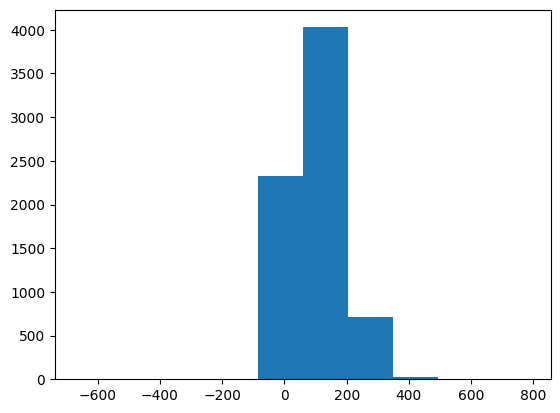

In [3]:
import matplotlib.pyplot as plt

plt.hist(df['k_vrh'])

## Elastic Property

In [4]:
df.describe()

,k_voigt,k_reuss,k_vrh,g_voigt,g_reuss,g_vrh,universal_anisotropy,homogeneous_poisson,symmetry_number
count,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000
mean,108.859490,104.365398,106.612444,53.954932,43.936623,48.945777,6.001285,0.287040,142.420934
std,75.156410,76.866762,75.554920,46.712508,162.481654,89.942096,429.829034,1.847910,74.546669
min,-665.309044,-665.309044,-665.309044,-401.863452,-6971.578892,-3476.434485,-13432.529515,-130.933087,1.000000
25%,48.813123,42.963905,45.914362,23.123391,14.642129,19.069248,0.148616,0.249817,63.000000
50%,99.572138,93.878449,96.739199,44.769164,36.254137,39.923357,0.513824,0.292658,164.000000
75%,157.789178,154.341686,155.358549,75.354341,69.019683,72.328637,1.623286,0.333117,216.000000
max,802.535923,765.038300,783.787111,529.122310,6565.863282,3295.183506,30571.028103,77.046915,230.000000


In [5]:
df.shape

(7108, 16)

In [43]:
df.isnull().sum()

material_id             0
formula_pretty          0
formula_anonymous       0
structure               0
chemsys                 0
is_metal                0
symmetry                0
k_voigt                 0
k_reuss                 0
k_vrh                   0
g_voigt                 0
g_reuss                 0
g_vrh                   0
universal_anisotropy    0
homogeneous_poisson     0
symmetry_number         0
dtype: int64

### Space group

In [ ]:
group_nums = []

for index, row in df.iterrows():
    group_num = row.symmetry.number
    group_nums.append(group_num)

df['Group_Number'] = group_nums
df.head()

### Plotting the k_vrh and g_vrh

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

k_vrh = df['k_vrh'].to_numpy()
k_vrh_range = np.max(k_vrh) - np.min(k_vrh)

plt.figure(figsize=(8,6))

sns.histplot(df['k_vrh'], color = 'blue')

plt.xlabel('GPa')
plt.ylabel('Count')
plt.grid(True)

plt.savefig('Images/histogram_k_vrh.png', bbox_inches='tight')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting.
g_vrh = df['g_vrh'].to_numpy()
g_vrh_range = np.max(g_vrh) - np.min(g_vrh)

# Create the histogram plot.
plt.figure(figsize=(8, 6))
sns.histplot(g_vrh, color='blue')

# Set the title and axis labels.
plt.xlabel('GPa')
plt.ylabel('Count')

# Add grid lines.
plt.grid(True)

# Save the plot.
plt.savefig('Images/histogram_g_vrh.png', bbox_inches='tight')

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting.
group_num = df['Group_Number'].to_numpy()
group_num_labels = [str(g) for g in group_num]

fig, ax = plt.subplots(1, 1)
ax.hist(group_num)

# # Create the histogram plot.
# plt.figure(figsize=(8, 6))
# sns.histplot(group_num, color='blue')

# Set the title and axis labels.
ax.set_xlabel('Group Number')
ax.set_ylabel('Count')

# Add grid lines.
plt.grid(True)

rects = ax.patches
for rect, label in zip(rects, group_num_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')

# Save the plot.
plt.savefig('Images/histogram_Group_Number.png', bbox_inches='tight')

plt.show()

### Converting the structure to cif string and saving it.

In [ ]:
from pymatgen.io.cif import CifWriter

df_save = df.copy()

structure_cif = []
for index, row in df_save.iterrows():
    structure = row["structure"]
    cif_writer = CifWriter(structure)
    cif_string = cif_writer.__str__()
    structure_cif.append(cif_string)

df_save['structure']=structure_cif

# Save the DataFrame to an Excel file
df_save.to_csv("Database/DataBase.csv", index=False)

## Converting the CIF string into Pymatgen Structure

In [ ]:
import pandas as pd
from pymatgen.io.cif import CifParser
from ase import Atoms
import numpy as np

structures = []

for n, cif in enumerate(np.array(df['structure'])):
    parser = CifParser.from_string(cif)
    structure = parser.get_structures()

    structures.append(structure)

df['structures_convert'] = structures

In [ ]:
import scripts.Cif2Pymatgen as cif

cif.convert(df)

# Descriptors

## Formula String to Composition

In [44]:
# Str to composition descriptor
from matminer.featurizers.conversions import StrToComposition

df_form = df.copy()

df_form = StrToComposition().featurize_dataframe(df_form, "formula_pretty")
df_form.head()

StrToComposition: 100%|██████████| 7108/7108 [00:03<00:00, 1934.57it/s]



,material_id,formula_pretty,formula_anonymous,structure,chemsys,is_metal,symmetry,k_voigt,k_reuss,k_vrh,g_voigt,g_reuss,g_vrh,universal_anisotropy,homogeneous_poisson,symmetry_number,composition
0,mp-23004,CsMgCl3,ABC3,# generated using pymatgen\ndata_CsMgCl3\n_sym...,Cl-Cs-Mg,False,crystal_system=<CrystalSystem.hex_: 'Hexagonal...,13.854623,12.956739,13.405681,7.202808,3.154573,5.178690,6.485755,0.328882,194,"(Cs, Mg, Cl)"
1,mp-5784,Na2GeO3,AB2C3,# generated using pymatgen\ndata_Na2GeO3\n_sym...,Ge-Na-O,False,crystal_system=<CrystalSystem.ortho: 'Orthorho...,53.780124,52.594577,53.187351,28.936248,26.443242,27.689745,0.493929,0.278188,36,"(Na, Ge, O)"
2,mp-4681,NaNbO3,ABC3,# generated using pymatgen\ndata_NaNbO3\n_symm...,Na-Nb-O,False,crystal_system=<CrystalSystem.ortho: 'Orthorho...,88.850213,83.266084,86.058148,55.184470,47.672711,51.428591,0.854911,0.250833,26,"(Na, Nb, O)"
3,mp-754318,MnZnO3,ABC3,# generated using pymatgen\ndata_MnZnO3\n_symm...,Mn-O-Zn,False,crystal_system=<CrystalSystem.trig: 'Trigonal'...,161.655076,158.225588,159.940332,61.303782,38.534549,49.919166,2.976067,0.358650,148,"(Mn, Zn, O)"
4,mp-555064,Cd(CO2)2,AB2C4,# generated using pymatgen\ndata_Cd(CO2)2\n_sy...,C-Cd-O,False,crystal_system=<CrystalSystem.mono: 'Monoclini...,54.364652,32.837697,43.601175,28.961662,16.161801,22.561731,4.615468,0.279333,14,"(Cd, C, O)"


## Element Property in Magpie

In [45]:
# Element Property Descriptor magpie

from matminer.featurizers.composition import ElementProperty

ep_feat = ElementProperty.from_preset(preset_name="magpie")
df_form = ep_feat.featurize_dataframe(df_form, col_id="composition")  # input the "composition" column to the featurizer
df_form.head()

ElementProperty: 100%|██████████| 7108/7108 [00:16<00:00, 438.98it/s]


,material_id,formula_pretty,formula_anonymous,structure,chemsys,is_metal,symmetry,k_voigt,k_reuss,k_vrh,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,mp-23004,CsMgCl3,ABC3,# generated using pymatgen\ndata_CsMgCl3\n_sym...,Cl-Cs-Mg,False,crystal_system=<CrystalSystem.hex_: 'Hexagonal...,13.854623,12.956739,13.405681,...,0.00000,0.000000,0.000000,0.0,64.0,229.0,165.0,123.000000,70.800000,64.0
1,mp-5784,Na2GeO3,AB2C3,# generated using pymatgen\ndata_Na2GeO3\n_sym...,Ge-Na-O,False,crystal_system=<CrystalSystem.ortho: 'Orthorho...,53.780124,52.594577,53.187351,...,0.00000,0.000000,0.000000,0.0,12.0,229.0,217.0,119.833333,107.833333,12.0
2,mp-4681,NaNbO3,ABC3,# generated using pymatgen\ndata_NaNbO3\n_symm...,Na-Nb-O,False,crystal_system=<CrystalSystem.ortho: 'Orthorho...,88.850213,83.266084,86.058148,...,0.00000,0.000000,0.000000,0.0,12.0,229.0,217.0,98.800000,104.160000,12.0
3,mp-754318,MnZnO3,ABC3,# generated using pymatgen\ndata_MnZnO3\n_symm...,Mn-O-Zn,False,crystal_system=<CrystalSystem.trig: 'Trigonal'...,161.655076,158.225588,159.940332,...,0.00031,0.000062,0.000099,0.0,12.0,217.0,205.0,89.400000,92.880000,12.0
4,mp-555064,Cd(CO2)2,AB2C4,# generated using pymatgen\ndata_Cd(CO2)2\n_sy...,C-Cd-O,False,crystal_system=<CrystalSystem.mono: 'Monoclini...,54.364652,32.837697,43.601175,...,0.00000,0.000000,0.000000,0.0,12.0,194.0,182.0,90.000000,89.142857,12.0


## Data Input

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split

df_form = df_form.dropna()

feat_col = np.array(df_form.columns[17:])

# Label
k_vrh = df_form['k_vrh']
g_vrh = df_form['g_vrh']
uni_ani = df_form['universal_anisotropy']
hom_poi = df_form['homogeneous_poisson']

# Input data
X = df_form[feat_col]

In [ ]:
np.save('./TrainingData/feat_col.npy', feat_col)

np.save('./TrainingData/k_vrh.npy', k_vrh.values)
np.save('./TrainingData/g_vrh.npy', g_vrh.values)
np.save('./TrainingData/universal_anisotropy.npy', uni_ani.values)
np.save('./TrainingData/homogeneous_poisson.npy', hom_poi.values)

# Input data
np.save('./TrainingData/element_property_descriptor.npy', X.values)

In [ ]:
feat_col = np.load('./TrainingData/feat_col.npy', allow_pickle=True)
k_vrh = np.load('./TrainingData/k_vrh.npy')
g_vrh = np.load('./TrainingData/g_vrh.npy')
uni_ani = np.load('./TrainingData/universal_anisotropy.npy')
hom_poi = np.load('./TrainingData/homogeneous_poisson.npy')
X = np.load('./TrainingData/element_property_descriptor.npy')


## Structure Descriptors

In [ ]:
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.composition import ElementProperty, Stoichiometry, ValenceOrbital, IonProperty
from matminer.featurizers.structure import (SiteStatsFingerprint, StructuralHeterogeneity,
                                            ChemicalOrdering, StructureComposition, MaximumPackingEfficiency)

In [ ]:
featurizer = MultipleFeaturizer([
    SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017"),
    StructuralHeterogeneity(),
    ChemicalOrdering(),
    MaximumPackingEfficiency(),
    SiteStatsFingerprint.from_preset("LocalPropertyDifference_ward-prb-2017"),
    StructureComposition(Stoichiometry()),
    StructureComposition(ElementProperty.from_preset("magpie")),
    StructureComposition(ValenceOrbital(props=['frac'])),
    StructureComposition(IonProperty(fast=True))
])

In [ ]:
df_loaded.head()

In [ ]:
test_df = df_loaded.copy()
test_df = test_df.iloc[:3,:]
structure = featurizer.featurize_many(test_df['structure'], ignore_errors=True)

# Deep Learning

## Importing Package

In [33]:
import tensorflow as tf
import json
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

2023-11-28 18:22:46.298187: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-28 18:22:46.300468: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 18:22:46.346415: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 18:22:46.346920: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 18:22:46.913259: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Train

In [53]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, k_vrh, test_size=0.2, random_state=42)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))

# Define the input layer with the appropriate input shape
input_layer = tf.keras.layers.Input(shape=(len(feat_col),))

model = tf.keras.Sequential([
        input_layer,
        normalizer,
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=10,
    verbose=1,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
    batch_size=32
)

Epoch 1/10
143/143 [==============================] - 1s 4ms/step - loss: 105.0935 - val_loss: 103.4902
Epoch 2/10
143/143 [==============================] - 1s 4ms/step - loss: 99.6071 - val_loss: 97.2704
Epoch 3/10
143/143 [==============================] - 0s 3ms/step - loss: 94.3704 - val_loss: 92.5911
Epoch 4/10
143/143 [==============================] - 1s 4ms/step - loss: 90.5914 - val_loss: 89.1979
Epoch 5/10
143/143 [==============================] - 0s 3ms/step - loss: 87.4221 - val_loss: 85.9135
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: 84.1018 - val_loss: 82.2920
Epoch 7/10
143/143 [==============================] - 0s 3ms/step - loss: 80.3462 - val_loss: 78.2889
Epoch 8/10
143/143 [==============================] - 0s 3ms/step - loss: 76.3971 - val_loss: 74.2995
Epoch 9/10
143/143 [==============================] - 0s 3ms/step - loss: 72.6685 - val_loss: 70.6907
Epoch 10/10
143/143 [==============================] - 0s 3ms/step - loss: 69.44

In [ ]:
# Define a list of different numbers of neurons and hidden layers
neurons = [8, 16, 32, 64, 128, 256, ]
hid_layers = [0, 1, 2, 3, 4, 5, 6]

# Create an empty dictionary to store the results
results = {}

# Create a function to build and train the model with given parameters
def build_and_train_model(num_neurons, num_hidden_layers):
    # Define the input layer with the appropriate input shape
    input_layer = tf.keras.layers.Input(shape=(len(feat_col),))

    # Initialize a list to store the hidden layers
    hidden_layers = []

    # Create the hidden layers
    for _ in range(num_hidden_layers):
        hidden_layers.append(tf.keras.layers.Dense(num_neurons, activation='relu'))

    # Define the model
    model = tf.keras.Sequential([input_layer] + hidden_layers + [tf.keras.layers.Dense(1)])

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

    # Train the model
    history = model.fit(
        np.array(train_dataset),
        np.array(train_labels),
        epochs=10,
        verbose=0,
        validation_split=0.2,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
        batch_size=32
    )

    # Extract the final validation loss
    loss = history.history['val_loss'][-1]

    return loss

# Iterate through the number of hidden layers first
for num_hidden_layers in hid_layers:
    # Create a dictionary for the results of this number of hidden layers
    results[num_hidden_layers] = {}

    # Iterate through the different numbers of neurons
    for num_neurons in neurons:
        loss = build_and_train_model(num_neurons, num_hidden_layers)
        results[num_hidden_layers][num_neurons] = loss

In [ ]:
# Print the results
for num_hidden_layers, neurons_loss in results.items():
    print(f'Hidden Layers: {num_hidden_layers}')
    for num_neurons, loss in neurons_loss.items():
        print(f'  Neurons: {num_neurons}, Final Validation Loss: {loss}')

### Saving

In [ ]:
import json

# Save the results to a JSON file
with open('Results/FormulaResults.json', 'w') as json_file:
    json.dump(results, json_file)

### Opening results

In [31]:
import json

# Load the results from the JSON file
with open('Results/FormulaResults1.json', 'r') as json_file:
    results = json.load(json_file)

NameError: name 'json' is not defined

In [57]:
import json

# Load the results from the JSON file
with open('Results/FormulaResults2.json', 'r') as json_file:
    results = json.load(json_file)

### Getting the best model

In [58]:
# Initialize variables to track the best model and its loss
best_loss = float('inf')  # Initialize to positive infinity
best_hidden_layers = None
best_neurons = None

# Iterate through the results
for num_hidden_layers, neurons_loss in results.items():
    for num_neurons, loss in neurons_loss.items():
        if loss < best_loss:
            best_loss = loss
            best_hidden_layers = num_hidden_layers
            best_neurons = num_neurons

# Print the best model
print(f'Best Model:')
print(f'  Hidden Layers: {best_hidden_layers}')
print(f'  Neurons: {best_neurons}')
print(f'  Lowest Validation Loss: {best_loss}')

Best Model:
  Hidden Layers: 6
  Neurons: 256
  Lowest Validation Loss: 25.6633358001709


### Saving the best model

In [ ]:
# Define the input layer with the appropriate input shape
input_layer = tf.keras.layers.Input(shape=(len(feat_col),))

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))

# Initialize a list to store the hidden layers
hidden_layers = []

# Create the hidden layers
for _ in range(int(best_hidden_layers)):
    hidden_layers.append(tf.keras.layers.Dense(int(best_neurons), activation='relu'))

# Define the model
model = tf.keras.Sequential([input_layer, normalizer] + hidden_layers + [tf.keras.layers.Dense(1)])

# Compile the model
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=5000,
    verbose=1,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
    batch_size=8
)

model.save("Models/Formula_Layers_Neurons.h5")

## Learning Rate

In [ ]:
learning_rate_range = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
losses = []

# Define the input layer with the appropriate input shape
input_layer = tf.keras.layers.Input(shape=(len(feat_col),))

# Initialize a list to store the hidden layers
hidden_layers = []

for learning_rate in learning_rate_range:

    # Create the hidden layers
    for _ in range(int(best_hidden_layers)):
        hidden_layers.append(tf.keras.layers.Dense(int(best_neurons), activation='relu'))

    # Define the model
    model = tf.keras.Sequential([input_layer] + hidden_layers + [tf.keras.layers.Dense(1)])

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=10,
        verbose=0,
        validation_split=0.2,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
        batch_size=32
    )
    
    last_epoch_loss = history.history['val_loss'][-1]

    losses.append(last_epoch_loss)

In [ ]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, k_vrh, test_size=0.2, random_state=42)

# Define a list of different numbers of neurons and hidden layers
neurons = [8, 16, 32, 64, 128, 256, ]
hid_layers = [0, 1, 2, 3, 4, 5, 6]
learning_rate_ranges = [0.01, 0.001, 0.0001, 0.00001, 0.000001]

# Create an empty dictionary to store the results
results = {}

# Create a function to build and train the model with given parameters
def build_and_train_model(num_neurons, num_hidden_layers, learning_rate):
    
    # Define the input layer with the appropriate input shape
    input_layer = tf.keras.layers.Input(shape=(len(feat_col),))

    # Initialize a list to store the hidden layers
    hidden_layers = []

    # Create the hidden layers
    for _ in range(num_hidden_layers):
        hidden_layers.append(tf.keras.layers.Dense(num_neurons, activation='relu'))

    # Define the model
    model = tf.keras.Sequential([input_layer] + hidden_layers + [tf.keras.layers.Dense(1)])

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

    # Train the model
    history = model.fit(
        np.array(X_train),
        np.array(y_train),
        epochs=10,
        verbose=0,
        validation_split=0.2,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
        batch_size=32
    )

    # Extract the final validation loss
    loss = history.history['val_loss'][-1]
        

    return loss

# Iterate through the number of hidden layers first
for num_hidden_layers in hid_layers:
    # Create a dictionary for the results of this number of hidden layers
    results[num_hidden_layers] = {}

    # Iterate through the different numbers of neurons
    for num_neurons in neurons:
        results[num_hidden_layers][num_neurons] = {}
        
        for learning_rate in learning_rate_ranges:
            loss = build_and_train_model(num_neurons, num_hidden_layers, learning_rate)
            print(f'{num_hidden_layers=}, {num_neurons=}, {learning_rate=}, {loss=}')
            results[num_hidden_layers][num_neurons][learning_rate] = loss

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(learning_rate_range, losses, linestyle='--', marker='o', color='r')
plt.grid(True)
plt.xlabel('Learning Rate Range', fontsize=12)
plt.ylabel('Mean Absolute Error', fontsize=12)
plt.margins(0.05)

# Set x-axis to logarithmic scale
plt.gca().set_xscale('log')

plt.savefig('Images/LearningRateRange.png', dpi=300)
plt.show()


# Model Comparition

In [59]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = tf.keras.models.load_model("Models/Formula_Layers_Neurons.h5")
X = np.load('TrainingData/element_property_descriptor.npy')
k_vrh = np.load('TrainingData/k_vrh.npy')

X_train, X_test, y_train, y_test = train_test_split(X, k_vrh, test_size = 0.2, random_state = 42)

45/45 [==============================] - 0s 4ms/step


/tmp/ipykernel_29607/4211920069.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cividis')
/tmp/ipykernel_29607/4211920069.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


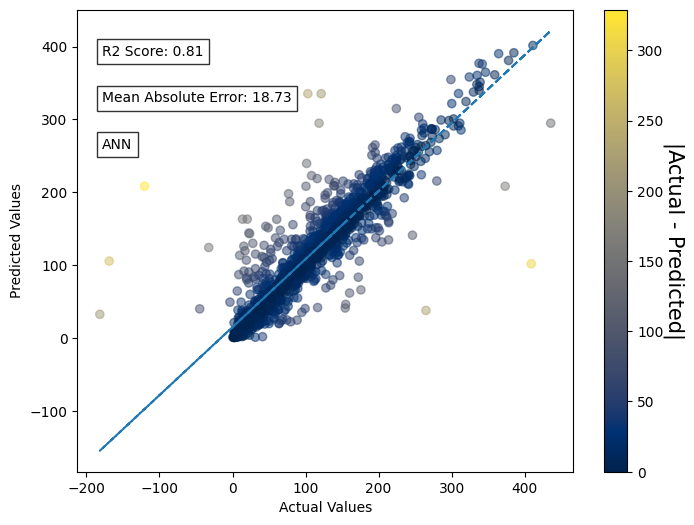

In [60]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = y_pred[:,0]

mse = mean_absolute_error(y_test, y_pred)
mse_text = f"Mean Absolute Error: {mse:.2f}"

r2 = r2_score(y_test, y_pred)
r2_text = f"R2 Score: {r2:.2f}"

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(y_test.reshape(-1,1), y_pred)
slope, intercept = lr.coef_[0], lr.intercept_

diff = np.abs(y_test-y_pred)

norm = plt.Normalize(vmin=0, vmax=np.max(diff))

cmap = plt.cm.get_cmap('cividis')
colors = cmap(norm(diff))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=colors, alpha=0.5)
plt.plot(y_test, slope*y_test + intercept, linestyle='dashed')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
# plt.title("Prediction vs. Actual Values")

plt.text(0.05, 0.8, mse_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.05, 0.9, r2_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.05, 0.7, "ANN", transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


sm = plt.cm.ScalarMappable(cmap='cividis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.set_ylabel('|Actual - Predicted|', rotation=270, fontsize = 15, labelpad=15)
plt.savefig('Images/ANNActualVsPredicted_El.png', dpi=300, bbox_inches='tight')
plt.show()

# Xgboost

## Train

In [64]:
import xgboost as xgb
import numpy as np

X = np.load('TrainingData/element_property_descriptor.npy')
k_vrh = np.load('TrainingData/k_vrh.npy')

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, k_vrh, test_size=0.2, random_state=42)

# Convert your data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {'objective': 'reg:squarederror'}

num_round = 10
model = xgb.train(params, dtrain, num_round)

In [65]:
import pickle
# Save the model to a file using pickle
with open("Models/el_xgboost.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

/tmp/ipykernel_29607/134092078.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cividis')
/tmp/ipykernel_29607/134092078.py:43: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


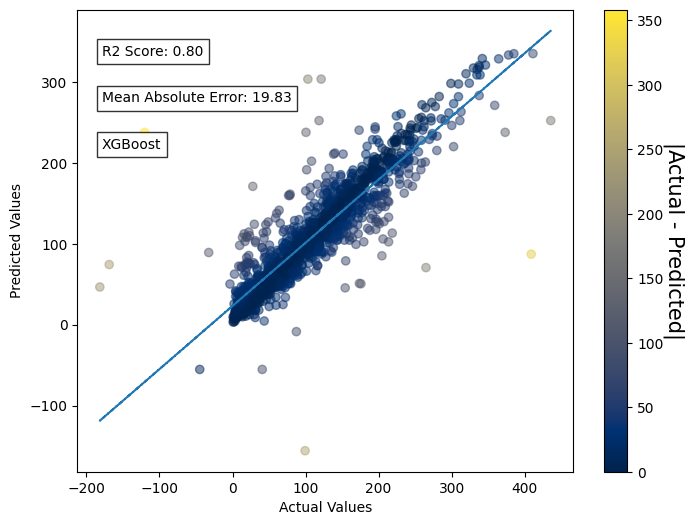

In [66]:
import matplotlib.pyplot as plt

# Load the model from the saved file
with open("Models/el_xgboost.pkl", "rb") as model_file:
    model = pickle.load(model_file)

dtest = xgb.DMatrix(X_test, label=y_test)

y_pred = model.predict(dtest)

mse = mean_absolute_error(y_test, y_pred)
mse_text = f"Mean Absolute Error: {mse:.2f}"

r2 = r2_score(y_test, y_pred)
r2_text = f"R2 Score: {r2:.2f}"

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(y_test.reshape(-1,1), y_pred)
slope, intercept = lr.coef_[0], lr.intercept_

diff = np.abs(y_test-y_pred)

norm = plt.Normalize(vmin=0, vmax=np.max(diff))

cmap = plt.cm.get_cmap('cividis')
colors = cmap(norm(diff))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=colors, alpha=0.5)
plt.plot(y_test, slope*y_test + intercept, linestyle='dashed')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
# plt.title("Prediction vs. Actual Values")

plt.text(0.05, 0.8, mse_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.05, 0.9, r2_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.05, 0.7, "XGBoost", transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

sm = plt.cm.ScalarMappable(cmap='cividis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.set_ylabel('|Actual - Predicted|', rotation=270, fontsize = 15, labelpad=15)
plt.savefig('Images/XgBoostActualVsPredicted_El.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Research Graph

## Formula

In [67]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

# Load the results from the JSON file
with open('Results/FormulaResults2.json', 'r') as json_file:
    results = json.load(json_file)

# Extract the number of neurons, hidden layers, and corresponding losses
neurons = [8, 16, 32, 64, 128, 256]
hid_layers = [0, 1, 2, 3, 4, 5, 6]
losses = []

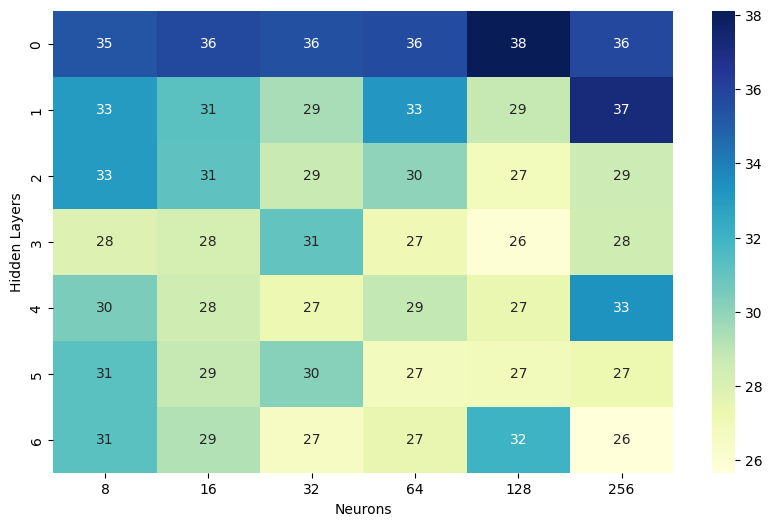

In [68]:
for num_hidden_layers in hid_layers:
    loss_row = []
    for num_neurons in neurons:
        loss = results[str(num_hidden_layers)][str(num_neurons)]
        loss_row.append(loss)
    losses.append(loss_row)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(losses, annot=True, xticklabels=neurons, yticklabels=hid_layers, cmap='YlGnBu')
plt.xlabel('Neurons')
plt.ylabel('Hidden Layers')
plt.savefig('Images/Formula_loss_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [69]:
losses = []
for num_hidden_layers in hid_layers:
    for num_neurons in neurons:
        loss = results[str(num_hidden_layers)][str(num_neurons)]
        losses.append(loss)

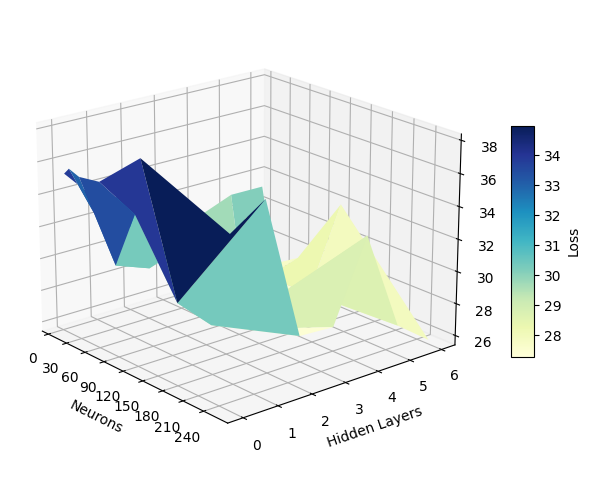

In [70]:
# Create a meshgrid for x and y
X, Y = np.meshgrid(neurons, hid_layers)

# Reshape the losses to match the dimensions of X and Y
Z = np.array(losses).reshape(X.shape)

# Create the 3D plot with better settings
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with smooth shading and color map
surf = ax.plot_surface(X, Y, Z, cmap='YlGnBu', linewidth=0, antialiased=True)

# Set axes labels and title
ax.set_xlabel('Neurons')
ax.set_ylabel('Hidden Layers')
ax.set_zlabel('')
ax.set_title('')  # Remove the title

# Set ticks and labels to be more legible
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Add color bar for reference, show it to the right
color_bar = fig.colorbar(surf, shrink=0.5, aspect=10)
color_bar.set_label('Loss')

# Customize viewing angle for better presentation
ax.view_init(elev=20, azim=-40)

# Save the figure as an image file for publication
plt.savefig('Images/Formula_loss_surface.png', dpi=300, bbox_inches='tight')

# Show the plot (for visualization)
plt.show()